# Read Me!

Welcome to the sales forecasting prototype.

Before starting, please note that this is a prototype. To make this a fully-fledged analytical tool for all small businesses to use, surveys need to be conducted with multiple e-commerce stores to gather information about their data storage methods. This will help adjust the data upload and processing for all sheets.

Data:

The data can be downloaded here from Kaggle, add it to your Google Drive, find My Drive, make a folder calling Forecasting inside, and add the data in csv format into that folder so it says data.csv. This will connect the data to the notebook.

To run the notebook, please follow these steps (finish reading this section before clicking):

Click on "Runtime" -> "Run all" in the top left corner. This will execute the algorithm, which will ask for permission to access the specified data in Google Drive. Click "Accept" and/or "Yes" to grant permission, and the algorithm will run.

Use the table of contents on the left side to quickly navigate through the notebook. Many code cells are hidden for ease of navigation in sections like data exploration, analysis, and machine learning results. You can view and edit the code, but these changes will be private and won"t affect the public notebook.

Using AI:

Below is a link to a Chrome extension that integrates Google Colab into the notebook. To enable the extension, ensure that the settings allow the extension permission to connect to Google Colab (This notebook). If you are using Chrome, you can click on the puzzle icon on the right of the search bar to find the permissions. Please refresh this page after enabling the extension.

What this extension does is provide a small box labeled "Chat GPT" on top of each code cell. When clicked, it allows you to learn about, test, and edit code according to your business needs. Since this is a prototype published o be improvement within individual businesses, it enables users with minimal or years of knowledge in the sector to make changes and interpret the code quicker. It includes quick settings such as excluding code from the AI prompt to ask other questions that are not about the code.

Link: https://chrome.google.com/webstore/detail/chatgpt-for-google-colab/dfhfeifekpgapdlhfakecbbinnnfoohh


This is a creation of an intelligent and visual sales forecasting system for small businesses. 

It uses:

*   Data cleaning methods
*   Libraries for visualising data
*   Machine Learning to forecast sales 
*   Checkout recommendation analysis (Market Basket Analysis)
*   An option to use Chat GPT for self management of the notebook for your business


What can you improve in this notebook for your business:

*   Tailored data format upload
*   Adding weather data 
*   Visualise data in ther ways as needed for your business
*   Forecasting accuracy
*   Try different forms of market basket analysis








# Libraries and Data Upload

The data upload format for this study follows a specific order of columns: InvoiceNo - StockCode - Description - Quantity - InvoiceDate - UnitPrice - CustomerID - Country.

One thing to ensure is even if the InvoiceNo is the same but it has two products this should be two seperate lines in the spreadsheet.

Libraries imported

In [ ]:
import pandas as pd
import numpy as np
import requests
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

from mlxtend.frequent_patterns import apriori, association_rules

# Enabelling the LabelEncoder
le = LabelEncoder()

from google.colab import drive # Gets my data stored in the cloud
drive.mount("/content/drive")

# Libraries imported, if imported correctly the below will print
print("Libraries imported.") 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Libraries imported.


Upload data set

In [ ]:
# Data set upload 
filepath = "/content/drive/MyDrive/Forecasting/data.csv"

In [ ]:
# I needed the below code to figure ut why it wsa not working
"""
# Library called Chardent to detect the encoding
import chardet 

# Opens the file in binary 
with open(filepath, "rb") as f: 
    result = chardet.detect(f.read())

# Prints encoding value
print(result["encoding"]) 
"""

'\n# Library called Chardent to detect the encoding\nimport chardet \n\n# Opens the file in binary \nwith open(filepath, "rb") as f: \n    result = chardet.detect(f.read())\n\n# Prints encoding value\nprint(result["encoding"]) \n'

In [ ]:
# First look at the dataset
df = pd.read_csv(filepath, encoding = "ISO-8859-1") # Encoding as would not open
df.head(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom


In [ ]:
# Initial look at the data types
# df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


# Data Prep/ Investigation




In [ ]:
# Turns columns to datetime data type
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])

# Seperate date column
df["Date"] = df["InvoiceDate"].dt.date
# Time column
df["InvoiceTime"] = df["InvoiceDate"].dt.time
# df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
 8   Date         541909 non-null  object        
 9   InvoiceTime  541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(6)
memory usage: 41.3+ MB


In [ ]:
# convert column from object to string
df["Description"] = df["Description"].astype(str)

# Storing rows with words found thorught the project that are not product sales
remove_words = ["AMAZON FEE", "Manual", "Adjust bad debt", "Bank Charges", "CRUK Commission", "Discount", "SAMPLES"]

# Boolean indexing to drop rows containing specific words
df = df[~df["Description"].str.contains("|".join(remove_words))]

df.isnull().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     134848
Country             0
Date                0
InvoiceTime         0
dtype: int64

In [ ]:
# Have a total order column by multiplying the quantity by unit price
df["TotalPrice"] = df["Quantity"] * df["UnitPrice"]

# df.head(2)

In [ ]:
# Missing values
# df.isnull().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     134848
Country             0
Date                0
InvoiceTime         0
TotalPrice          0
dtype: int64

In [56]:
# Checking the df
# df.describe()

In [ ]:
# Assuming that minus values are refunds
# print(df[df["Quantity"] < 0])

       InvoiceNo StockCode                        Description  Quantity  \
154      C536383    35004C    SET OF 3 COLOURED  FLYING DUCKS        -1   
235      C536391     22556     PLASTERS IN TIN CIRCUS PARADE        -12   
236      C536391     21984   PACK OF 12 PINK PAISLEY TISSUES        -24   
237      C536391     21983   PACK OF 12 BLUE PAISLEY TISSUES        -24   
238      C536391     21980  PACK OF 12 RED RETROSPOT TISSUES        -24   
...          ...       ...                                ...       ...   
540448   C581490     22178    VICTORIAN GLASS HANGING T-LIGHT       -12   
540449   C581490     23144    ZINC T-LIGHT HOLDER STARS SMALL       -11   
541715   C581568     21258         VICTORIAN SEWING BOX LARGE        -5   
541716   C581569     84978   HANGING HEART JAR T-LIGHT HOLDER        -1   
541717   C581569     20979      36 PENCILS TUBE RED RETROSPOT        -5   

               InvoiceDate  UnitPrice  CustomerID         Country        Date  \
154    2010-12-01 

In [ ]:
# Need to reference/ If quantity is negative, it is a returned or cancelled item
df["Transaction Type"] = np.where(df["Quantity"] < 0, "Cancelled", "Sale")

# Print the resulting dataframe
# print(df)

       InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID         Country        Da

In [ ]:
#@title Duplicates
# If row duplicated store here
Duplicates = df[df.duplicated(keep=False)]

# If statement which shows 
if len(Duplicates) > 0:
  # Prints the length or count of duplicate rows
    print("Total count of duplicate rows:", len(Duplicates))
# If all duplicates missing or now deleted will show no duplicate found
else:
    print("No duplicate rows found.")

    
# Droppin doubles
df = df.drop_duplicates()

# DOne again to check if deleted now
Duplicates2 = df[df.duplicated(keep=False)]

# If statement which shows 
if len(Duplicates2) > 0:
  # Prints the length or count of duplicate rows
    print("Total count of duplicate rows:", len(Duplicates2))
# If all duplicates missing or now deleted will show no duplicate found
else:
    print("No duplicate rows found, they have now been deleted.")


Total count of duplicate rows: 10139
No duplicate rows found, they have now been deleted.


In [ ]:
#@title Start/End Date
# Looking for start and end date in df
StartDate = (df["InvoiceDate"].min())
EndDate = (df["InvoiceDate"].max())
print("Start date of data set: ", StartDate)
print("End date of data set: ", EndDate)

Start date of data set:  2010-12-01 08:26:00
End date of data set:  2011-12-09 12:50:00


In [ ]:
# df.describe()

,Quantity,UnitPrice,CustomerID,TotalPrice
count,535845.000000,535845.000000,401039.000000,535845.000000
mean,9.631302,3.750082,15281.284591,18.758160
std,219.254999,23.426482,1713.913167,368.868079
min,-80995.000000,0.000000,12346.000000,-168469.600000
25%,1.000000,1.250000,13939.000000,3.750000
50%,3.000000,2.080000,15145.000000,9.870000
75%,10.000000,4.130000,16788.000000,17.400000
max,80995.000000,8142.750000,18287.000000,168469.600000


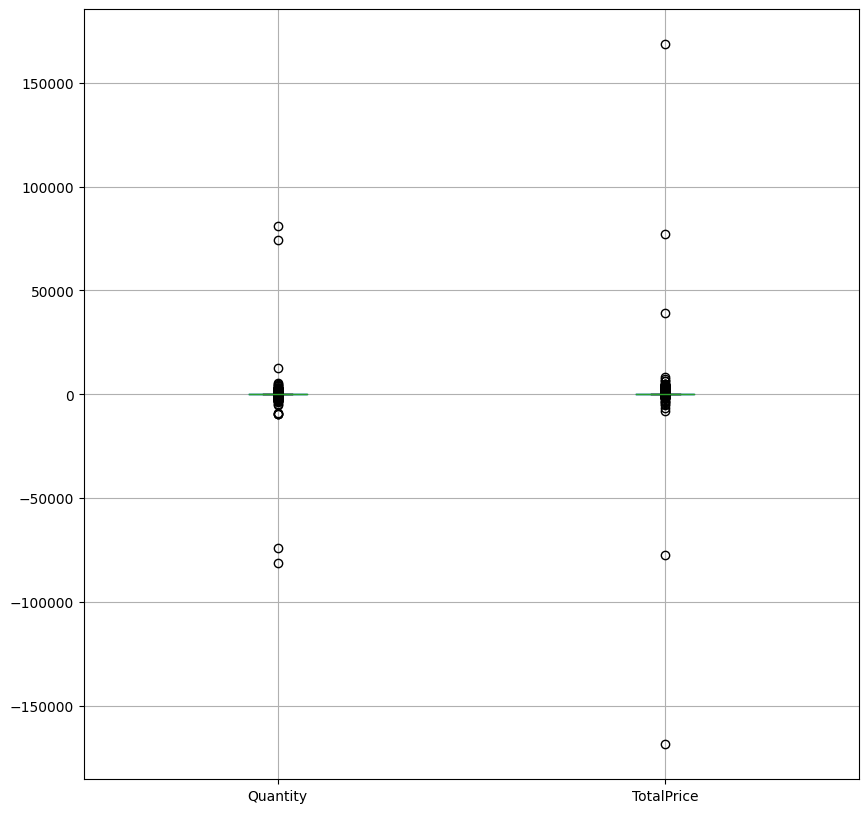

In [ ]:
# Locating outliers throuhg a box plot, on colu,n qunatity by price
df.loc[:, ["Quantity", "TotalPrice"]].boxplot(figsize = (10,10));

In [ ]:
# Function with some pre argumetns inside
def remove_outliers(data, lower_percentile = 0.25, upper_percentile = 0.75):
  # Defining Q's
    q1 = data.quantile(lower_percentile)
    q3 = data.quantile(upper_percentile)
    # Finding the inter quartile range
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    # Checks if data is in side the quartile range and stored
    filtered_data = data[(data >= lower_bound) & (data <= upper_bound)]
    return filtered_data

In [ ]:
# Outliers removed for quantity
df.Quantity = remove_outliers(df.Quantity)
# Outliers removed for price
df.Revenue = remove_outliers(df.TotalPrice)
df.dropna(inplace=True)
df.loc[:, ["Quantity", "TotalPrice"]].describe()

<ipython-input-18-6ccaabdf0e46>:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.Revenue = remove_outliers(df.TotalPrice)


,Quantity,TotalPrice
count,345678.000000,345678.000000
mean,5.451808,12.901452
std,4.772568,26.123162
min,-12.000000,-8142.750000
25%,2.000000,3.750000
50%,4.000000,10.000000
75%,10.000000,17.340000
max,23.000000,8142.750000


# Connecting to the Weather API
 

In [ ]:
# The weather API to link the histprical weather data
Base_URL = "http://api.openweathermap.org/data/2.5/weather?"
API_Key = "1e81f8cce84f885d279386c4a8f53d23"
CITY = "London"

# Created URL to call 
url = Base_URL + "appid=" + API_Key + "&q=" + CITY
# Data stored in JSON
APIjson = requests.get(url).json()

print(APIjson)

{'coord': {'lon': -0.1257, 'lat': 51.5085}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 285.94, 'feels_like': 284.84, 'temp_min': 284.64, 'temp_max': 287.09, 'pressure': 1019, 'humidity': 60}, 'visibility': 10000, 'wind': {'speed': 5.14, 'deg': 330}, 'clouds': {'all': 100}, 'dt': 1684142730, 'sys': {'type': 2, 'id': 2075535, 'country': 'GB', 'sunrise': 1684123758, 'sunset': 1684179874}, 'timezone': 3600, 'id': 2643743, 'name': 'London', 'cod': 200}


In [ ]:
# Function the turns weather to calsius
def kelvin2celsius(kelvin):
  celsius = kelvin - 273.15
  return celsius

In [ ]:
# Temp is in kelvin so turned it into celsius
temp_kelvin = APIjson ["main"]["temp"]
temp_celsius = kelvin2celsius(temp_kelvin)
feels_like_kelvin = APIjson ["main"]["feels_like"]
feels_like_celsius = kelvin2celsius(feels_like_kelvin)
# Description is the weather description which could be important
description = APIjson["weather"][0]["description"]

# Prints results
print(f"Current temperature in {CITY}: {temp_celsius:.2f} C")
print(f"Current temperature in {CITY} feels like: {feels_like_celsius:.2f} C")
print(f"General Weather in {CITY}: {description}")

Current temperature in London: 12.79 C
Current temperature in London feels like: 11.69 C
General Weather in London: overcast clouds


In [ ]:
# Shows available API keys
APIjson.keys()

dict_keys(['coord', 'weather', 'base', 'main', 'visibility', 'wind', 'clouds', 'dt', 'sys', 'timezone', 'id', 'name', 'cod'])

In [ ]:
# The two I will use look at type to convert to df
print("Data type for main is: ", type(APIjson["main"]))
print("Data type for weather is: ", type(APIjson["weather"]))
print("Data type for dt is: ", type(APIjson["dt"]))

Data type for main is:  <class 'dict'>
Data type for weather is:  <class 'list'>
Data type for dt is:  <class 'int'>


In [ ]:
# Convert to df
TestDf = pd.DataFrame(APIjson["main"], index = [0])
TestDf

,temp,feels_like,temp_min,temp_max,pressure,humidity
0,285.94,284.84,284.64,287.09,1019,60


In [ ]:
"""
 # Getting the wanted weather data from he Json data
weather_data = {"Temperature": kelvin2celsius(APIjson["main"]["temp"]),
  "Feels Like": kelvin2celsius(APIjson["main"]["feels_like"]),
  "Min Temperature": kelvin2celsius(APIjson["main"]["temp_min"]),
  "Max Temperature": kelvin2celsius(APIjson["main"]["temp_max"])}

# Adds the weather data to the df
WeatherDF = df.append(weather_data, ignore_index=True)
WeatherDF
"""

'\n # Getting the wanted weather data from he Json data\nweather_data = {"Temperature": kelvin2celsius(APIjson["main"]["temp"]),\n  "Feels Like": kelvin2celsius(APIjson["main"]["feels_like"]),\n  "Min Temperature": kelvin2celsius(APIjson["main"]["temp_min"]),\n  "Max Temperature": kelvin2celsius(APIjson["main"]["temp_max"])}\n\n# Adds the weather data to the df\nWeatherDF = df.append(weather_data, ignore_index=True)\nWeatherDF\n'

# Linking the weather data to the data frame


In [ ]:
# Would not work no matter what, tired batch processing, found out after that there is a max number of reuqests. 

'\nbatch_count = 0\nBATCH_SIZE = 100 \nfor batch_start in range(0, len(df), BATCH_SIZE):\n    batch_end = min(batch_start + BATCH_SIZE, len(df))\n    batch_df = df.iloc[batch_start:batch_end]\n    \n    # Create an empty list to store the API responses\n    responses = []\n    \n    # Iterate over each row in the batch\n    for index, row in batch_df.iterrows():\n        date = row["Date"]\n        date_str = date.strftime("%Y-%m-%d")\n    \n        # Update the API URL with the current date\n        batch_url = Base_URL + "appid=" + API_Key + "&q=" + CITY + "&dt=" + date_str\n    \n        # Send GET request to the API endpoint\n        response = requests.get(batch_url)\n        responses.append(response)\n    \n    # Process the API responses\n    for index, response in enumerate(responses):\n        row = batch_df.iloc[index]\n        date = row["Date"]\n    \n        try:\n            # Check if the request was successful\n            response.raise_for_status()\n            \n   

# Data Analysis (Product)

In [ ]:
#@title Country Sales
import plotly.express as px

# New Country df with columns for the graph
CountryDF = df[["Country", "Quantity", "TotalPrice"]]

# Grouping all countries to see the biggest buyers with.sum()
CountryDFgrouped = CountryDF.groupby("Country").sum()

# Top 20 countries based on Quantity
CountryDFquantity = CountryDFgrouped.sort_values("Quantity", ascending = False).head(20)

# Bar chart for Quantity on x and country on y axis using Plotly made horizontal
fig_quantity = px.bar(CountryDFquantity, x = "Quantity", y = CountryDFquantity.index, 
                      orientation = "h", labels={"Quantity": "Quantity Sold", "y": "Country"}, title = "Top 20 Countries by Quantity Sold")

# Adding in colour code for graph
fig_quantity.update_traces(marker = dict(color = px.colors.sequential.Oranges))

fig_quantity.show()

# top 20 countries based on Total Price
CountryDFprice = CountryDFgrouped.sort_values("TotalPrice", ascending = False).head(20)

# Bar chart for Total Price on x and country on y axis using Plotly made horizontal
fig_price = px.bar(CountryDFprice, x = "TotalPrice", y = CountryDFprice.index, orientation="h",
                   labels={"TotalPrice": "Total Price", "y": "Country"}, title = "Top 20 Countries by Total Price")

# Adding in colour code for graph
fig_price.update_traces(marker = dict(color = px.colors.sequential.Oranges))

fig_price.show()


Top 25 best-selling products:
                                    TotalPrice  Quantity  UnitPrice
Description                                                        
REGENCY CAKESTAND 3 TIER              81409.30    6857.0  11.872437
POSTAGE                               66710.24    3002.0  22.221932
PARTY BUNTING                         32599.83    6599.0   4.940117
WHITE HANGING HEART T-LIGHT HOLDER    29075.56    9860.0   2.948840
JUMBO BAG RED RETROSPOT               24644.90   12025.0   2.049472
SPOTTY BUNTING                        22169.05    4483.0   4.945137
DOORMAT KEEP CALM AND COME IN         21006.34    2801.0   7.499586
JAM MAKING SET WITH JARS              18769.74    4581.0   4.097302
SET OF 3 CAKE TINS PANTRY DESIGN      17552.48    3546.0   4.949938
ASSORTED COLOUR BIRD ORNAMENT         17197.44   10176.0   1.690000
DOORMAT RED RETROSPOT                 16431.93    2243.0   7.325872
NATURAL SLATE HEART CHALKBOARD        16333.37    5463.0   2.989817
WOOD BLACK BOARD A

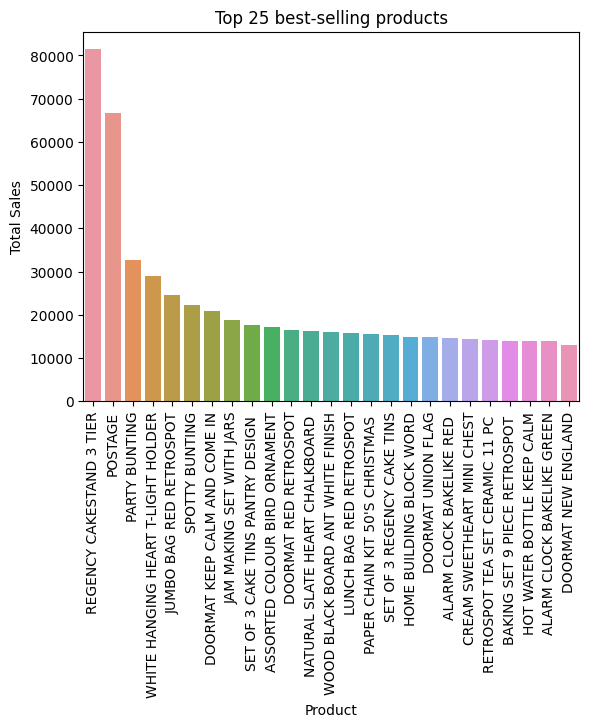

Worst 25 products:
                                     TotalPrice  Quantity  UnitPrice
Description                                                         
CHALKBOARD KITCHEN ORGANISER             -87.80      -4.0  21.950000
BROCADE RING PURSE                       -77.94     267.0  -0.291910
WHITE CHERRY LIGHTS                      -54.00      -8.0   6.750000
CREAM SWEETHEART MAGAZINE RACK           -46.85      -3.0  15.616667
WOODEN BOX ADVENT CALENDAR               -45.70      -6.0   7.616667
HANGING RIDGE GLASS T-LIGHT HOLDER       -40.56     -24.0   1.690000
PINK CHERRY LIGHTS                       -27.00      -4.0   6.750000
BLUE PADDED SOFT MOBILE                  -25.50      -6.0   4.250000
ANTIQUE LILY FAIRY LIGHTS                -14.85      -3.0   4.950000
CREAM SWEETHEART TRAYS                   -12.75      -1.0  12.750000
TEA TIME CAKE STAND IN GIFT BOX          -10.75      -1.0  10.750000
CREAM SWEETHEART SHELF + HOOKS            -7.95      -1.0   7.950000
3 WICK CHRISTMA

<function matplotlib.pyplot.show(close=None, block=None)>

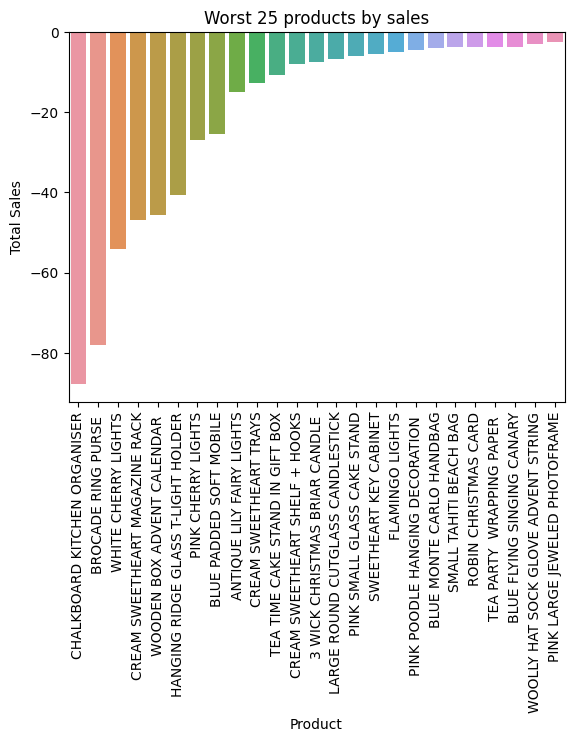

In [ ]:
#@title Best/Worst selling products (Attempt 1)
# Group the data by product and sum the total sales, quantity, and calculate the unit price for each product
ProductSummary = df.groupby("Description").agg({"TotalPrice": "sum", "Quantity": "sum"})
ProductSummary["UnitPrice"] = ProductSummary["TotalPrice"] / ProductSummary["Quantity"]

# Sort the products by total sales in descending order and select the top 25
BestProduct = ProductSummary.sort_values(by="TotalPrice", ascending=False).head(25)

# Print the top 25 products
print("Top 25 best-selling products:")
print(BestProduct)

# Plot the top 25 products and their sales
sns.barplot(x = BestProduct.index, y = "TotalPrice", data = BestProduct)
plt.title("Top 25 best-selling products")
plt.xlabel("Product")
plt.ylabel("Total Sales")
plt.xticks(rotation=90)
plt.show()

# Sort the products by total sales in ascending order and select the worst 25
WorstProduct = ProductSummary.sort_values(by="TotalPrice").head(25)

# Print the worst 25 products
print("Worst 25 products:")
# Prints in list format
print(WorstProduct)

# Plot the worst 25 products and their sales
sns.barplot(x = WorstProduct.index, y  ="TotalPrice", data = WorstProduct)
# Addint titles to the graoh
plt.title("Worst 25 products by sales")
plt.xlabel("Product")
plt.ylabel("Total Sales")
plt.xticks(rotation=90)
plt.show

In [ ]:
#@title Best/ Worst selling products (Attemtpt 2)
import plotly.graph_objects as go
import plotly.express as px

# Sort the products by total sales in descending order and select the top 25
BestProduct = ProductSummary.sort_values(by = "TotalPrice", ascending = False).head(25)

# Plot the top 25 products and their sales
fig = px.bar(BestProduct, x=BestProduct.index, y = "TotalPrice", hover_data = ["Quantity", "UnitPrice"])
fig.update_layout(
    title="Top 25 best-selling products",
    xaxis_title="Product",
    yaxis_title="Total Sales")

# Adding in colour code for graoh
fig.update_traces(marker=dict(color=px.colors.sequential.Greens))

fig.show()

# Sort the products by total sales in ascending order and select the worst 25
WorstProduct = ProductSummary.sort_values(by = "TotalPrice").head(45)

# Plot the worst 25 products and their sales
fig = px.bar(WorstProduct, x = WorstProduct.index, y="TotalPrice", hover_data=["Quantity", "UnitPrice"])
fig.update_layout(title = "Worst 25 products by sales", xaxis_title = "Product", yaxis_title = "Total Sales")

# Adding in colour code for graoh
fig.update_traces(marker = dict(color = x.colors.sequential.Reds))

fig.show()

In [ ]:
# Create own month and year column with pandas to see if month has any correlation with the data set
df["Year"] = pd.to_datetime(df["InvoiceDate"]).dt.year
df["Quarter"] = df.InvoiceDate.dt.quarter
df["Month"] = pd.to_datetime(df["InvoiceDate"]).dt.month
df["Week"] = pd.to_datetime(df["InvoiceDate"]).dt.isocalendar().week

In [ ]:
# Convert InvoiceDate to datetime type
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])

# Create a new column IsWeekend based on the day of the week
df["IsWeekend"] = (df["InvoiceDate"].dt.dayofweek >= 5).astype(int)

In [ ]:
# To check it worked, uses bool to check if 1 which means yes it is weekend
weekend = df[df["IsWeekend"] == True]
# Check it worked
# print(weekend)

In [ ]:
#@title Duplicates
# If row duplicated store here
Duplicates = df[df.duplicated(keep=False)]

# There were over 10,000 duplicates, if statement
if len(Duplicates) > 0:
  # Prints the length or count of duplicate rows
  print("Current count of duplicate rows:", len(Duplicates))
  # Droppin doubles
  df = df.drop_duplicates()
# If all duplicates missing or now deleted will show no duplicate found
else:
  print("No duplicate rows found to begin with.")

# If there are still duplicated rows
Duplicates2 = df[df.duplicated(keep=False)]

# There were over 10,000 duplicates, if statement
if len(Duplicates2) > 0:
  # Prints the length or count of duplicate rows
  print("Total count of duplicate rows after current count:", len(Duplicates2))
# If all duplicates missing or now deleted will show no duplicate found
else:
  print("No duplicate rows found, all have been deleted successfully.")

No duplicate rows found to begin with.
No duplicate rows found, all have been deleted successfully.


# Encoding Data


Encoding to numeric/binary value

In [ ]:
df.info()
PreDf = df.copy()
PreDf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 345678 entries, 0 to 541908
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   InvoiceNo         345678 non-null  object        
 1   StockCode         345678 non-null  object        
 2   Description       345678 non-null  object        
 3   Quantity          345678 non-null  float64       
 4   InvoiceDate       345678 non-null  datetime64[ns]
 5   UnitPrice         345678 non-null  float64       
 6   CustomerID        345678 non-null  float64       
 7   Country           345678 non-null  object        
 8   Date              345678 non-null  object        
 9   InvoiceTime       345678 non-null  object        
 10  TotalPrice        345678 non-null  float64       
 11  Transaction Type  345678 non-null  object        
 12  Year              345678 non-null  int64         
 13  Quarter           345678 non-null  int64         
 14  Mont

In [ ]:
# apply label encoding to the columns
df["StockCode"] = le.fit_transform(df["StockCode"])
df["Description"] = le.fit_transform(df["Description"])
df["Country"] = le.fit_transform(df["Country"])
df["Transaction Type"] = le.fit_transform(df["Transaction Type"])

# Sorting data types
df["Year"] = df["InvoiceDate"].dt.year
df["Date"] = df["InvoiceDate"].dt.day
df["Week"] = df["InvoiceDate"].dt.week
df["InvoiceTime"] = df["InvoiceDate"].dt.hour * 60 + df["InvoiceDate"].dt.minute

<ipython-input-35-3ba5db27b988>:10: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.



In [ ]:
# Make Range between Max and min
AllDates = pd.date_range(start = StartDate, end = EndDate, freq = "D").date

# Dates between max and min
IncludedDates = df["InvoiceDate"].dt.date.unique()

# Dates not included in df
MissingDates = np.setdiff1d(AllDates, IncludedDates)

# All Missing Dates
print("Dates where there were no invoices sold:\n\n", MissingDates)

Dates where there were no invoices sold:

 [datetime.date(2010, 12, 4) datetime.date(2010, 12, 11)
 datetime.date(2010, 12, 18) datetime.date(2010, 12, 24)
 datetime.date(2010, 12, 25) datetime.date(2010, 12, 26)
 datetime.date(2010, 12, 27) datetime.date(2010, 12, 28)
 datetime.date(2010, 12, 29) datetime.date(2010, 12, 30)
 datetime.date(2010, 12, 31) datetime.date(2011, 1, 1)
 datetime.date(2011, 1, 2) datetime.date(2011, 1, 3)
 datetime.date(2011, 1, 8) datetime.date(2011, 1, 15)
 datetime.date(2011, 1, 22) datetime.date(2011, 1, 29)
 datetime.date(2011, 2, 5) datetime.date(2011, 2, 12)
 datetime.date(2011, 2, 19) datetime.date(2011, 2, 26)
 datetime.date(2011, 3, 5) datetime.date(2011, 3, 12)
 datetime.date(2011, 3, 19) datetime.date(2011, 3, 26)
 datetime.date(2011, 4, 2) datetime.date(2011, 4, 9)
 datetime.date(2011, 4, 16) datetime.date(2011, 4, 22)
 datetime.date(2011, 4, 23) datetime.date(2011, 4, 24)
 datetime.date(2011, 4, 25) datetime.date(2011, 4, 29)
 datetime.date(2011,

In [ ]:
#df.info()

# Heatmap


Correlation Matrix

<ipython-input-38-fa2a679b9333>:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

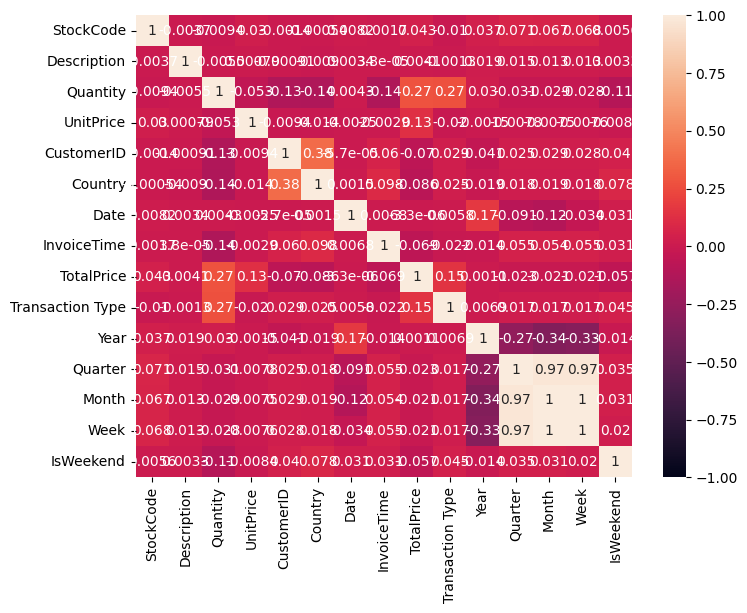

In [ ]:
# Heatmap, df.correlation anlaysis on whole df
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(df.corr(), vmin = -1, vmax = 1, annot = True)

In [ ]:
# Grouping columns and adding them based on the columns in brackets
grouped_df = df.groupby(["StockCode", "IsWeekend", "Date", "Year", "Month", "Week", "Country"]).agg({"TotalPrice": "sum", "Quantity": "sum"})

# Resets index
grouped_df = grouped_df.reset_index()

In [ ]:
grouped_df.isnull().sum()

StockCode     0
IsWeekend     0
Date          0
Year          0
Month         0
Week          0
Country       0
TotalPrice    0
Quantity      0
dtype: int64

# Data Anlaysis (Sales)

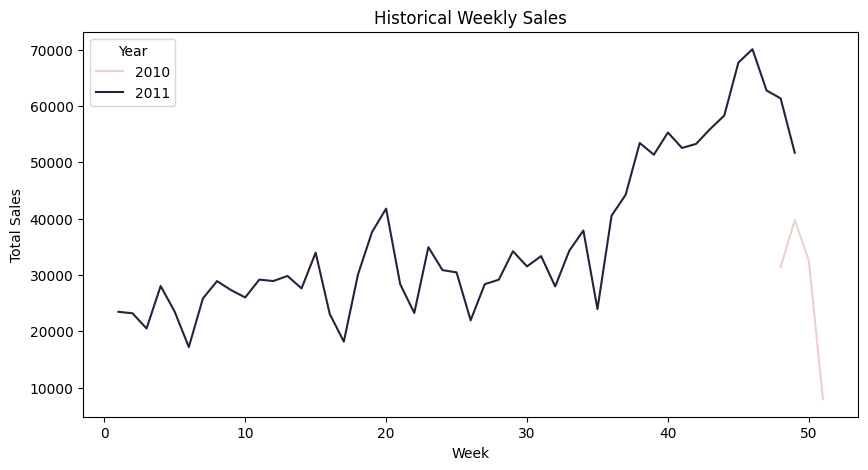

In [ ]:
# Compute the total monthly sales
WeeklySales = df.groupby(["Year", "Week"])["Quantity"].sum().reset_index()

# Plot the historical monthly sales with year hue
plt.figure(figsize=(10, 5))
sns.lineplot(x="Week", y="Quantity", hue="Year", data=WeeklySales)
plt.xlabel("Week")
plt.ylabel("Total Sales")
plt.title("Historical Weekly Sales")
plt.legend(title="Year")
plt.show()

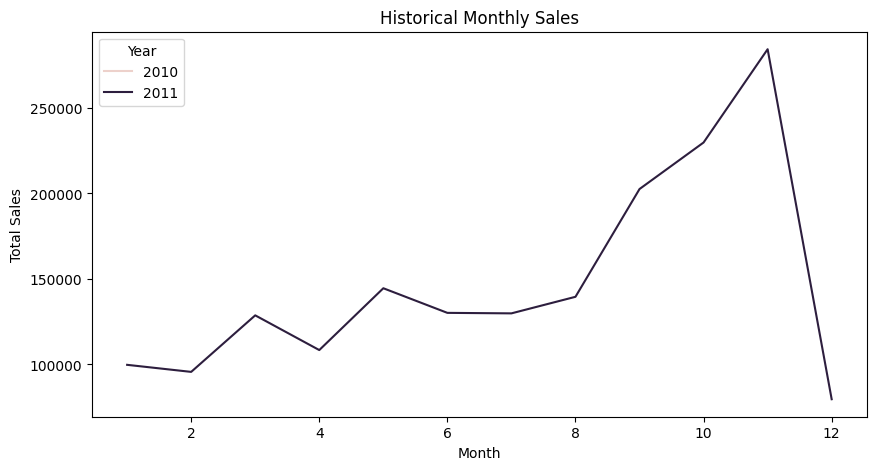

In [ ]:
# Compute the total monthly sales
MonthlySales = df.groupby(["Year", "Month"])["Quantity"].sum().reset_index()

# Plot the historical monthly sales with year hue
plt.figure(figsize=(10, 5))
sns.lineplot(x="Month", y="Quantity", hue ="Year", data=MonthlySales)
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.title("Historical Monthly Sales")
plt.legend(title="Year")
plt.show()

<Axes: >

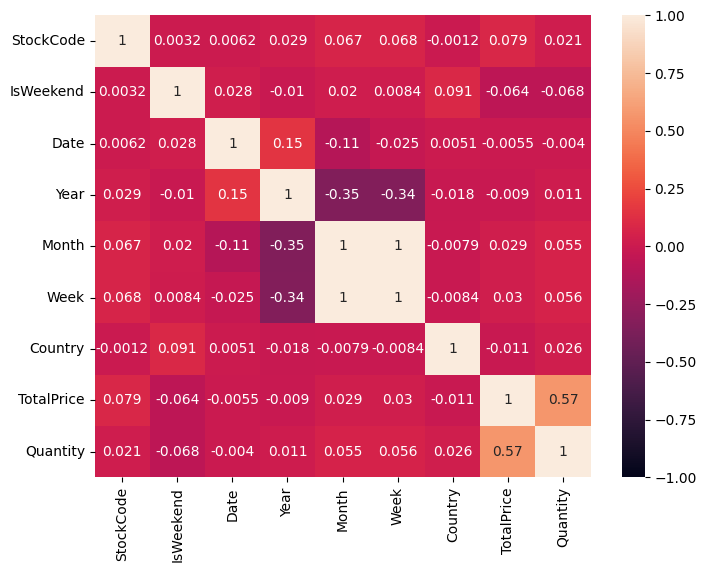

In [ ]:
# Heatmap, df.correlation anlaysis on whole df
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(grouped_df.corr(), vmin = -1, vmax = 1, annot = True)

In [ ]:
FullDf = df.copy()
df= df.drop(["CustomerID"], axis=1)
df= df.drop(["InvoiceNo"], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 345678 entries, 0 to 541908
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   StockCode         345678 non-null  int64         
 1   Description       345678 non-null  int64         
 2   Quantity          345678 non-null  float64       
 3   InvoiceDate       345678 non-null  datetime64[ns]
 4   UnitPrice         345678 non-null  float64       
 5   Country           345678 non-null  int64         
 6   Date              345678 non-null  int64         
 7   InvoiceTime       345678 non-null  int64         
 8   TotalPrice        345678 non-null  float64       
 9   Transaction Type  345678 non-null  int64         
 10  Year              345678 non-null  int64         
 11  Quarter           345678 non-null  int64         
 12  Month             345678 non-null  int64         
 13  Week              345678 non-null  int64         
 14  IsWe

# Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

# Dropping as no needed
X = df.drop(["InvoiceDate"],axis=1)

# Target Variable, predict sales
y = df.TotalPrice
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, shuffle=False)
print(X_train)
X_test.info()

        StockCode  Description  Quantity  UnitPrice  Country  Date  \
0            3179         3656       6.0       2.55       35     1   
1            2586         3664       6.0       3.39       35     1   
2            2787          845       8.0       2.75       35     1   
3            2735         1781       6.0       3.39       35     1   
4            2734         2725       6.0       3.39       35     1   
...           ...          ...       ...        ...      ...   ...   
411171       3173         3143       6.0       0.29       35    21   
411173       2469         3385       2.0       4.95       35    21   
411174        296         2777       2.0       0.95       35    21   
411175       1009          722       8.0       2.10       35    21   
411176       1008          724       2.0       1.45       35    21   

        InvoiceTime  TotalPrice  Transaction Type  Year  Quarter  Month  Week  \
0               506       15.30                 1  2010        4     12    48 

# Machine Learning Algorithm 1 (Inventory Sales Forecasting)



In [ ]:
df.isnull().sum()

StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
Country             0
Date                0
InvoiceTime         0
TotalPrice          0
Transaction Type    0
Year                0
Quarter             0
Month               0
Week                0
IsWeekend           0
dtype: int64

LinearRegression: RMSE=9.725623279742112e-14, R^2=1.0


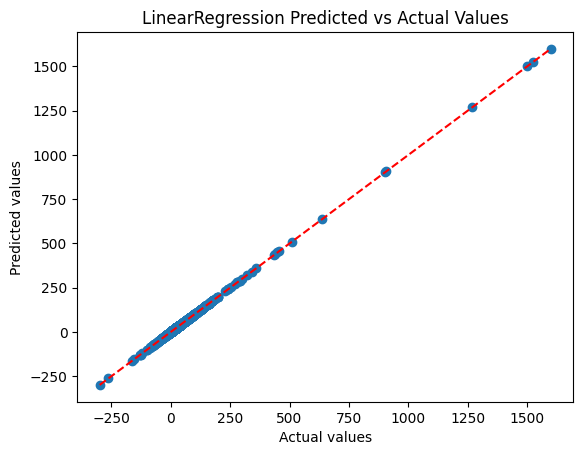

DecisionTreeRegressor: RMSE=4.153794897355206, R^2=0.9477093281782445


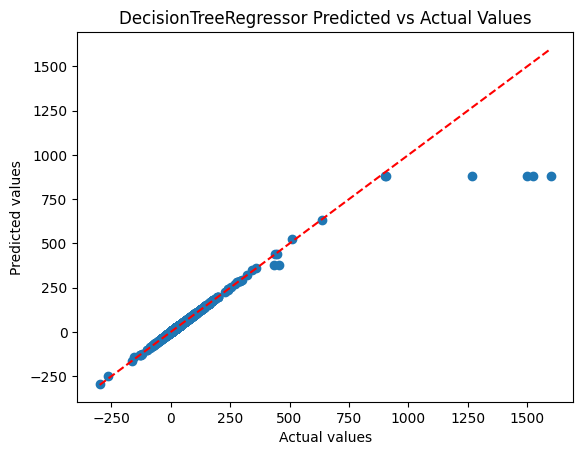

XGBRegressor: RMSE=4.146944704341346, R^2=0.9478816553352317


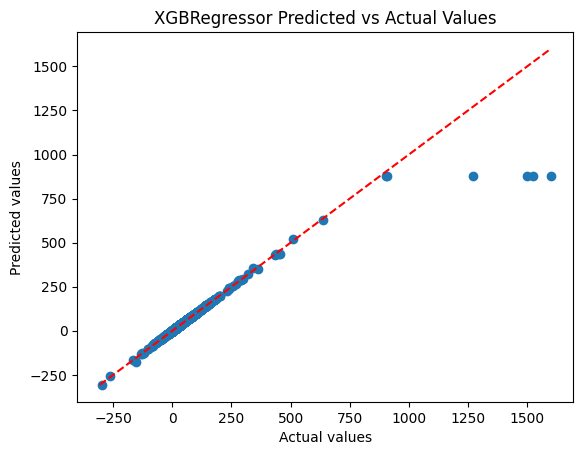

In [ ]:
# Import necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Trained and evaluated different regression models
models = [LinearRegression(), DecisionTreeRegressor(), XGBRegressor()]

# For loop to print over each model
for model in models:
    # Train
    model.fit(X_train, y_train)
    # Predict
    y_pred = model.predict(X_test)
    # Check accuracy RMSE and R^2 scores
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse ** 0.5
    r2 = r2_score(y_test, y_pred)
    print(f"{type(model).__name__}: RMSE={rmse}, R^2={r2}")

    # Calculate the forecasted values
    if isinstance(model, LinearRegression):
        forecast = model.predict(X_test)

    # Plot predicted vs actual valuess
    plt.scatter(y_test, y_pred)
    plt.xlabel("Actual values")
    plt.ylabel("Predicted values")
    # Title wiht model name
    plt.title(f"{type(model).__name__} Predicted vs Actual Values")

    # Add a line diagonally to aid visulisation
    min_value = min(y_test.min(), y_pred.min())
    max_value = max(y_test.max(), y_pred.max())
    plt.plot([min_value, max_value], [min_value, max_value], "r--")
    plt.show()

In [ ]:
# library needed
from plotly.subplots import make_subplots

# Function to show graph
def ShowMe(date, true, preds):
    # Plots
    fig = make_subplots(rows=1, cols=1)

    # Adding the true values to the graph
    fig.add_trace(go.Scatter(x = date, y = true.iloc[:, 0], mode = "lines", marker = dict(color = "#783242"), name = "True"))
    # Addes forcasted values to the graph
    fig.add_trace(go.Scatter(x = date, y = preds.iloc[:, 0], mode="lines", name = "Preds"))

    # Tidying up the graph
    fig.update_layout(
        xaxis = dict(title = "Date"),
        yaxis = dict(title = "TotalPrice"),
        title = "Forecasted Values vs True Values"
    )

    fig.show()

In [ ]:
# If else codnition for graph with forcasted values ontop of actual
if isinstance(model, LinearRegression):
    forecast = model.predict(X_test.drop("forecast", axis=1))
else:
    forecast = model.predict(X_test)

# Created a new DataFrame for the forecasted values
ForecastDF = pd.DataFrame({"Date": X_test["Date"], "forecast": forecast})

# Combine the forecasted values with the historical data
CombinedDF = pd.concat([df, ForecastDF], ignore_index=True)

# Split the combined DataFrame into true and predicted values based on the splitter index
splitter = round(len(df) * 0.75)
true = CombinedDF.loc[splitter:, ["Date", "TotalPrice"]].groupby("Date").mean()
preds = CombinedDF.loc[splitter:, ["Date", "forecast"]].groupby("Date").mean()

# Plot the true and predicted values
ShowMe(true.index, true, preds)

In [ ]:
PreDf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 345678 entries, 0 to 541908
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   InvoiceNo         345678 non-null  object        
 1   StockCode         345678 non-null  object        
 2   Description       345678 non-null  object        
 3   Quantity          345678 non-null  float64       
 4   InvoiceDate       345678 non-null  datetime64[ns]
 5   UnitPrice         345678 non-null  float64       
 6   CustomerID        345678 non-null  float64       
 7   Country           345678 non-null  object        
 8   Date              345678 non-null  object        
 9   InvoiceTime       345678 non-null  object        
 10  TotalPrice        345678 non-null  float64       
 11  Transaction Type  345678 non-null  object        
 12  Year              345678 non-null  int64         
 13  Quarter           345678 non-null  int64         
 14  Mont

# Market Basket Analysis

Use this to find which products are commonly bought together, this helps with increasing your sales be recommending products at checkout. This uses the apriori algorithm which looks at frequency of items bought together and says its subsets are also frequent.

In [ ]:
#@title Checking if there are orders with multiple products
# Stores dublicate InvoiceNo
DuplicateInvoices = PreDf[PreDf.duplicated(["InvoiceNo"], keep=False)]

# If duplicated prints count in pDuplicateInvoice
if len(DuplicateInvoices) > 0:
    print("Total count of duplicate InvoiceNo:", len(DuplicateInvoices["InvoiceNo"].unique()))
    # If non print non
else:
    print("No duplicate InvoiceNo found.")

Total count of duplicate InvoiceNo: 17206


In [ ]:
# Same but for InvoiceNo and Description, shos if potetioal for analysis
DuplicateInvoices = PreDf[PreDf.duplicated(["InvoiceNo", "Description"], keep=False)]

if len(DuplicateInvoices) > 0:
    duplicate_counts = DuplicateInvoices["InvoiceNo"].value_counts()
    # Counts total Invoices with different description
    count = sum(duplicate_counts >= 2)
    print("Count of invoices with 2 or more products based on different descriptions:", count)
else:
    print("No duplicate InvoiceNo found.")

Count of invoices with 2 or more products based on different descriptions: 1834


In [ ]:
DuplicateRows = PreDf[PreDf.duplicated(keep=False)]

if len(DuplicateRows) > 0:
    print("Total count of duplicate rows:", len(DuplicateRows))
else:
    print("No duplicate rows found.")

No duplicate rows found.


In [ ]:
DuplicateInvoices = PreDf[PreDf.duplicated(["Description"], keep=False)]

if len(DuplicateInvoices) > 0:
    duplicate_counts = DuplicateInvoices["Description"].value_counts()
    count = sum(duplicate_counts >= 2)
    print("Count of invoices with the same description but different InvoiceNo:", count)
else:
    print("No duplicate invoices with the same description found.")

Count of invoices with the same description but different InvoiceNo: 3582


In [ ]:
#@title Aprori Algorithm (Recommended products result)

# basket or group
basket = (PreDf.groupby(["InvoiceNo", "Description"])["Quantity"]
          .sum().unstack().reset_index().fillna(0)
          .set_index("InvoiceNo"))

# Convert the quantity values to 0 or 1
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_sets = basket.applymap(encode_units)

# Apriori algorithm finds frequent itemsets, low min support as only a small % of sales can come here
frequent_itemsets = apriori(basket_sets, min_support=0.01, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Sort by descending order
rules = rules.sort_values(by = "confidence", ascending=False)

# Print the top 10 association rules
top_rules = rules.head(10)
print("Top 10 association rules:")
print(top_rules[["antecedents", "consequents", "support", "confidence", "lift"]])

# Gets the top items frequently together
top_items = top_rules["antecedents"].tolist() + top_rules["consequents"].tolist()
top_items = list(set(top_items))  # Remove duplicates

# Print the top items frequently together
print("\nTop items frequently paired together:\n")
if len(top_items) >= 2:
    for itemset in top_items:
        if len(itemset) >= 2:
            print(", ".join(itemset))
else:
    print("\nNo frequent itemsets with 2 or more items found.")

Top 10 association rules:
                                           antecedents  \
510  (REGENCY CAKESTAND 3 TIER, PINK REGENCY TEACUP...   
354  (PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY...   
347  (REGENCY CAKESTAND 3 TIER, PINK REGENCY TEACUP...   
508  (REGENCY CAKESTAND 3 TIER, GREEN REGENCY TEACU...   
299                    (POPPY'S PLAYHOUSE LIVINGROOM )   
502  (REGENCY CAKESTAND 3 TIER, PINK REGENCY TEACUP...   
352  (GREEN REGENCY TEACUP AND SAUCER, PINK REGENCY...   
358  (REGENCY CAKESTAND 3 TIER, GREEN REGENCY TEACU...   
61                    (PINK REGENCY TEACUP AND SAUCER)   
297                       (POPPY'S PLAYHOUSE BEDROOM )   

                            consequents   support  confidence       lift  
510   (GREEN REGENCY TEACUP AND SAUCER)  0.010458    0.909091  30.222757  
354   (GREEN REGENCY TEACUP AND SAUCER)  0.016584    0.892761  29.679882  
347   (GREEN REGENCY TEACUP AND SAUCER)  0.012002    0.876364  29.134738  
508  (ROSES REGENCY TEACUP AND SAUC